In [7]:
import os
import pandas as pd

# 定义根目录和年份范围
csv_directory = 'DATA_nfirs2000-2021'
output_directory = './processed_data_fd'
years_csv = range(2005, 2012)
selected_columns = ["FF_DEATH", "STATE"]

# 初始化数据存储
all_data = []

# 读取2000到2011年的CSV数据
for year in years_csv:
    csv_file_path = os.path.join(csv_directory, f'NFIRS{year}', 'basicincident.csv')
    
    if os.path.exists(csv_file_path):
        print(f"Reading {csv_file_path}")
        
        # 读取数据
        df = pd.read_csv(csv_file_path, usecols=selected_columns)
        df = df[df['STATE'] == 'CA']  # 筛选加利福尼亚州的数据
        df['year'] = year  # 手动添加年份列
        all_data.append(df)
    else:
        print(f"File not found: {csv_file_path}")

# 合并所有数据
if all_data:
    all_data_df = pd.concat(all_data)
    print("All data successfully read and combined.")
else:
    print("No data to combine.")

# 输出合并后的数据框信息
print(all_data_df.info())
print(all_data_df.head())


Reading DATA_nfirs2000-2021/NFIRS2005/basicincident.csv
Reading DATA_nfirs2000-2021/NFIRS2006/basicincident.csv
Reading DATA_nfirs2000-2021/NFIRS2007/basicincident.csv
Reading DATA_nfirs2000-2021/NFIRS2008/basicincident.csv
Reading DATA_nfirs2000-2021/NFIRS2009/basicincident.csv
Reading DATA_nfirs2000-2021/NFIRS2010/basicincident.csv
Reading DATA_nfirs2000-2021/NFIRS2011/basicincident.csv
All data successfully read and combined.
<class 'pandas.core.frame.DataFrame'>
Index: 857999 entries, 72024 to 204477
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   STATE     857999 non-null  object
 1   FF_DEATH  857999 non-null  int64 
 2   year      857999 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.2+ MB
None
      STATE  FF_DEATH  year
72024    CA         0  2005
72025    CA         0  2005
72026    CA         0  2005
72027    CA         0  2005
72028    CA         0  2005


In [5]:
# 定义根目录和年份范围
txt_directory = 'DATA_nfirs2000-2021'
years_txt = range(2012, 2023)
selected_columns = ["FF_DEATH", "STATE"]

# 如果输出文件夹不存在，创建它
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# 逐年处理数据并保存为CSV文件
for year in years_txt:
    input_file_path = os.path.join(txt_directory, f'NFIRS{year}', 'basicincident.txt')
    output_file_path = os.path.join(output_directory, f'basicincident_{year}.csv')
    
    if os.path.exists(input_file_path):
        print(f"Processing {input_file_path}")
        
        # 删除已存在的输出文件
        if os.path.exists(output_file_path):
            os.remove(output_file_path)
        
        # 逐块读取并处理数据
        for chunk in pd.read_csv(input_file_path, delimiter='^', encoding='latin1', usecols=selected_columns, chunksize=5000):
            chunk = chunk[chunk['STATE'] == 'CA']  # 筛选加利福尼亚州的数据
            chunk.fillna(0, inplace=True)  # 将缺失值补充为 0
            chunk['year'] = year  # 添加年份列
            
            # 将处理后的数据块追加到CSV文件
            chunk.to_csv(output_file_path, mode='a', index=False, header=not os.path.exists(output_file_path))
        
        print(f"Saved processed data to {output_file_path}")
    else:
        print(f"File not found: {input_file_path}")

print("All files have been reprocessed and saved.")


Processing DATA_nfirs2000-2021/NFIRS2012/basicincident.txt
Saved processed data to ./processed_data_fd/basicincident_2012.csv
Processing DATA_nfirs2000-2021/NFIRS2013/basicincident.txt
Saved processed data to ./processed_data_fd/basicincident_2013.csv
Processing DATA_nfirs2000-2021/NFIRS2014/basicincident.txt
Saved processed data to ./processed_data_fd/basicincident_2014.csv
Processing DATA_nfirs2000-2021/NFIRS2015/basicincident.txt
Saved processed data to ./processed_data_fd/basicincident_2015.csv
Processing DATA_nfirs2000-2021/NFIRS2016/basicincident.txt
Saved processed data to ./processed_data_fd/basicincident_2016.csv
Processing DATA_nfirs2000-2021/NFIRS2017/basicincident.txt
Saved processed data to ./processed_data_fd/basicincident_2017.csv
Processing DATA_nfirs2000-2021/NFIRS2018/basicincident.txt
Saved processed data to ./processed_data_fd/basicincident_2018.csv
Processing DATA_nfirs2000-2021/NFIRS2019/basicincident.txt
Saved processed data to ./processed_data_fd/basicincident_2

Reading DATA_nfirs2000-2021/NFIRS2005/basicincident.csv
Reading DATA_nfirs2000-2021/NFIRS2006/basicincident.csv
Reading DATA_nfirs2000-2021/NFIRS2007/basicincident.csv
Reading DATA_nfirs2000-2021/NFIRS2008/basicincident.csv
Reading DATA_nfirs2000-2021/NFIRS2009/basicincident.csv
Reading DATA_nfirs2000-2021/NFIRS2010/basicincident.csv
Reading DATA_nfirs2000-2021/NFIRS2011/basicincident.csv
Reading ./processed_data_fd/basicincident_2012.csv
Reading ./processed_data_fd/basicincident_2013.csv
Reading ./processed_data_fd/basicincident_2014.csv
Reading ./processed_data_fd/basicincident_2015.csv
Reading ./processed_data_fd/basicincident_2016.csv
Reading ./processed_data_fd/basicincident_2017.csv
Reading ./processed_data_fd/basicincident_2018.csv
Reading ./processed_data_fd/basicincident_2019.csv
Reading ./processed_data_fd/basicincident_2020.csv
Reading ./processed_data_fd/basicincident_2021.csv
Reading ./processed_data_fd/basicincident_2022.csv


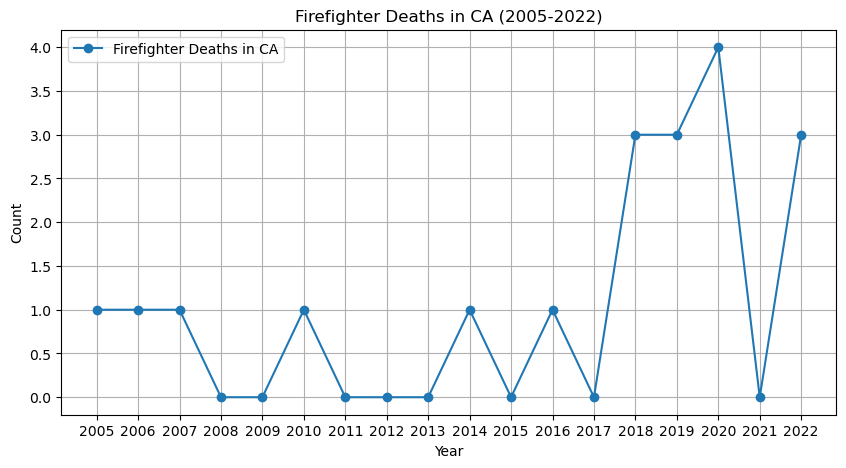

In [8]:
# 重新初始化数据存储
grouped_data = []

# 读取2005到2011年的CSV数据
for year in years_csv:
    csv_file_path = os.path.join(csv_directory, f'NFIRS{year}', 'basicincident.csv')
    
    if os.path.exists(csv_file_path):
        print(f"Reading {csv_file_path}")
        
        # 读取数据
        df = pd.read_csv(csv_file_path, usecols=selected_columns)
        df = df[df['STATE'] == 'CA']  # 筛选加利福尼亚州的数据
        df['year'] = year  # 手动添加年份列
        grouped_chunk = df.groupby('year')[["FF_DEATH"]].sum().reset_index()
        grouped_data.append(grouped_chunk)
    else:
        print(f"File not found: {csv_file_path}")

# 读取2012到2023年的CSV数据
for year in years_txt:
    output_file_path = os.path.join(output_directory, f'basicincident_{year}.csv')
    
    if os.path.exists(output_file_path):
        print(f"Reading {output_file_path}")
        
        # 逐块读取并处理数据
        try:
            for chunk in pd.read_csv(output_file_path, usecols=["FF_DEATH", 'year'], chunksize=5000):
                grouped_chunk = chunk.groupby('year')[["FF_DEATH"]].sum().reset_index()
                grouped_data.append(grouped_chunk)
        except ValueError as e:
            print(f"Skipping {output_file_path}: {e}")
    else:
        print(f"File not found: {output_file_path}")

# 合并所有分组后的数据
if grouped_data:
    all_grouped_data = pd.concat(grouped_data)

    # 计算每年的死亡数量
    final_grouped_data = all_grouped_data.groupby('year')[["FF_DEATH"]].sum().reset_index()

    # 确保年份列是整数类型
    final_grouped_data['year'] = final_grouped_data['year'].astype(int)

    # 填补可能的缺失年份
    full_years = pd.DataFrame({'year': list(range(2005, 2023))})
    final_grouped_data = full_years.merge(final_grouped_data, on='year', how='left').fillna(0)

    # 数据可视化
    plt.figure(figsize=(10, 5))
    plt.plot(final_grouped_data['year'], final_grouped_data['FF_DEATH'], label='Firefighter Deaths in CA', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Firefighter Deaths in CA (2005-2022)')
    plt.xticks(final_grouped_data['year'])  # 确保年份显示为整数
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No valid data to plot.")
